# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
import pandas as pd
import requests
import json
from api_keys import weather_api_key
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

cities_data="../Resources/cities.csv"

lat_range=(-90,90)
lng_range=(-180,180)

## Generate Cities List

In [3]:
#create lists to hold lattitude and longitude coordiantes
lat_lng=[]
cities=[]

#create locked tuple of latitude and longitude coordinates based on the range
lattitude=np.random.uniform(lat_range[0],lat_range[1],size=1500)
longitude=np.random.uniform(lng_range[0],lng_range[1],size=1500)

lats_and_lngs=zip(lattitude,longitude)

for n in lats_and_lngs:
    city=citipy.nearest_city(n[0],n[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
print(len(cities))


619


In [4]:
#create lists for variables to be created in new df
city_list=[]
temp_max=[]
hum=[]
cld=[]
wnd=[]
latt=[]
lng=[]
country=[]
date=[]

#initialize counter

units="imperial"
url=f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
counter=0
set_counter=1

print("Initial Data Retrieval")
print("-----------------------")

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(url + city).json()
        city_list.append(response['name'])
        cld.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        hum.append(response['main']['humidity'])
        latt.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        wnd.append(response['wind']['speed'])
        if counter > 49:
            counter = 0
            set_counter = set_counter + 1
    
        else:
            counter = counter + 1
            
        print(f"Processing Record {counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Initial Data Retrieval
-----------------------
Processing Record 1 of Set 1 : jamestown
City not found. Skipping...
Processing Record 2 of Set 1 : barrow
Processing Record 3 of Set 1 : puerto ayora
City not found. Skipping...
Processing Record 4 of Set 1 : alyangula
Processing Record 5 of Set 1 : tonota
City not found. Skipping...
Processing Record 6 of Set 1 : castro
Processing Record 7 of Set 1 : new norfolk
Processing Record 8 of Set 1 : boysun
Processing Record 9 of Set 1 : ushuaia
Processing Record 10 of Set 1 : bluff
Processing Record 11 of Set 1 : wanning
Processing Record 12 of Set 1 : nisia floresta
Processing Record 13 of Set 1 : bathsheba
Processing Record 14 of Set 1 : nola
Processing Record 15 of Set 1 : severo-kurilsk
City not found. Skipping...
Processing Record 16 of Set 1 : mar del plata
Processing Record 17 of Set 1 : tiksi
Processing Record 18 of Set 1 : hermanus
Processing Record 19 of Set 1 : faanui
Processing Record 20 of Set 1 : vardo
Processing Record 21 of Set 

Processing Record 35 of Set 4 : kasulu
Processing Record 36 of Set 4 : luderitz
Processing Record 37 of Set 4 : dakar
Processing Record 38 of Set 4 : jasper
Processing Record 39 of Set 4 : nemuro
Processing Record 40 of Set 4 : kavieng
Processing Record 41 of Set 4 : abu samrah
Processing Record 42 of Set 4 : avarua
Processing Record 43 of Set 4 : sisimiut
City not found. Skipping...
Processing Record 44 of Set 4 : road town
Processing Record 45 of Set 4 : bela vista
City not found. Skipping...
Processing Record 46 of Set 4 : kysyl-syr
Processing Record 47 of Set 4 : maumere
Processing Record 48 of Set 4 : gorin
Processing Record 49 of Set 4 : port-cartier
Processing Record 50 of Set 4 : tiarei
Processing Record 0 of Set 5 : san quintin
Processing Record 1 of Set 5 : sibolga
Processing Record 2 of Set 5 : leningradskiy
Processing Record 3 of Set 5 : bilma
Processing Record 4 of Set 5 : college
Processing Record 5 of Set 5 : portland
Processing Record 6 of Set 5 : sioux lookout
Processi

Processing Record 18 of Set 8 : soyo
Processing Record 19 of Set 8 : finnsnes
Processing Record 20 of Set 8 : grand gaube
Processing Record 21 of Set 8 : kaniama
Processing Record 22 of Set 8 : geraldton
Processing Record 23 of Set 8 : merauke
City not found. Skipping...
City not found. Skipping...
Processing Record 24 of Set 8 : medicine hat
Processing Record 25 of Set 8 : male
Processing Record 26 of Set 8 : smithers
Processing Record 27 of Set 8 : taoudenni
Processing Record 28 of Set 8 : musafirkhana
Processing Record 29 of Set 8 : harper
Processing Record 30 of Set 8 : asau
Processing Record 31 of Set 8 : north bend
City not found. Skipping...
Processing Record 32 of Set 8 : san luis
Processing Record 33 of Set 8 : goundi
Processing Record 34 of Set 8 : maradi
Processing Record 35 of Set 8 : trincomalee
City not found. Skipping...
Processing Record 36 of Set 8 : nantucket
Processing Record 37 of Set 8 : saint-joseph
Processing Record 38 of Set 8 : jales
Processing Record 39 of Set

Processing Record 3 of Set 12 : qingquan
Processing Record 4 of Set 12 : nipawin
Processing Record 5 of Set 12 : pontal do parana
Processing Record 6 of Set 12 : la paz
Processing Record 7 of Set 12 : yuli
Processing Record 8 of Set 12 : ascension
Processing Record 9 of Set 12 : urumqi
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
climate_dict={
          "City":city_list,
          "Country": country,
          "Wind Speed": wnd,
          "Cloudiness":cld,
          "Max Temperature": temp_max,
          "Humidity": hum,
          "Lattitude":latt,
          "Longitude": lng,
          "Date": date}
df = pd.DataFrame.from_dict(climate_dict, orient='index')
climate_df = df.transpose()
clean_climate_df=climate_df.dropna(how='any')
clean_climate_df.head()

,City,Country,Wind Speed,Cloudiness,Max Temperature,Humidity,Lattitude,Longitude,Date
0,Jamestown,US,6.91,1,73.04,73,42.097,-79.2353,1627264019
1,Barrow,US,18.41,90,39.22,95,71.2906,-156.7887,1627264090
2,Puerto Ayora,EC,7,3,71.55,88,-0.7393,-90.3518,1627264101
3,Alyangula,AU,10.36,66,82.27,44,-13.8483,136.4192,1627264435
4,Tonota,BW,7.65,0,41.7,83,-21.4833,27.4833,1627264631


In [7]:
clean_climate_df.count()

City               570
Country            570
Wind Speed         570
Cloudiness         570
Max Temperature    570
Humidity           570
Lattitude          570
Longitude          570
Date               570
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
clean_climate_df.loc[clean_climate_df['Humidity']<100]

,City,Country,Wind Speed,Cloudiness,Max Temperature,Humidity,Lattitude,Longitude,Date
0,Jamestown,US,6.91,1,73.04,73,42.097,-79.2353,1627264019
1,Barrow,US,18.41,90,39.22,95,71.2906,-156.7887,1627264090
2,Puerto Ayora,EC,7,3,71.55,88,-0.7393,-90.3518,1627264101
3,Alyangula,AU,10.36,66,82.27,44,-13.8483,136.4192,1627264435
4,Tonota,BW,7.65,0,41.7,83,-21.4833,27.4833,1627264631
...,...,...,...,...,...,...,...,...,...
565,Pontal do Paraná,BR,3.85,4,69.46,78,-25.6533,-48.5128,1627264743
566,La Paz,BO,5.75,40,39.18,55,-16.5,-68.15,1627264612
567,Yuli,NG,4.79,97,71.33,97,9.6989,10.2744,1627264744
568,Ascension,US,3.44,1,86.04,80,30.2169,-90.9001,1627264744


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [14]:
clean_climate_df.to_csv("../data/cities.csv", index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

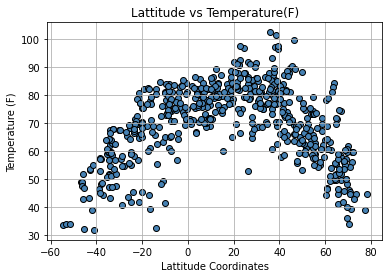

In [22]:
#plot
plt.scatter(clean_climate_df["Lattitude"], clean_climate_df["Max Temperature"], facecolor = "steelblue", edgecolor = "black")

#labels
plt.title("Lattitude vs Temperature(F)")
plt.ylabel("Temperature (F)")
plt.xlabel("Lattitude Coordinates")
plt.grid()
plt.savefig("../Images/city_latt_vs_temperature.png")

## Latitude vs. Humidity Plot

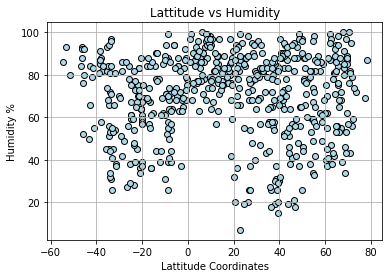

In [24]:
#plot
plt.scatter(clean_climate_df["Lattitude"], clean_climate_df["Humidity"], facecolor = "lightblue", edgecolor = "black")

#labels
plt.title("Lattitude vs Humidity")
plt.ylabel("Humidity %")
plt.xlabel("Lattitude Coordinates")
plt.grid()
plt.savefig("../Images/city_latt_vs_humidity.png")

## Latitude vs. Cloudiness Plot

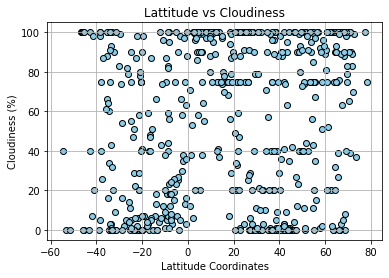

In [26]:
#plot
plt.scatter(clean_climate_df["Lattitude"], clean_climate_df["Cloudiness"], facecolor = "skyblue", edgecolor = "black")

#labels
plt.title("Lattitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Lattitude Coordinates")
plt.grid()
plt.savefig("../Images/city_latt_vs_cloudiness.png")

## Latitude vs. Wind Speed Plot

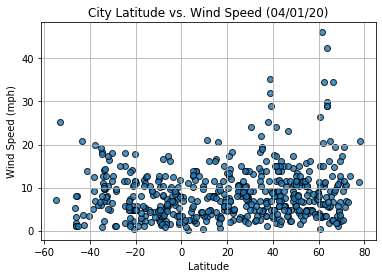

In [13]:
#plot
plt.scatter(clean_climate_df["Lattitude"], clean_climate_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

#labels
plt.title("Lattitude vs Windspeed")
plt.ylabel("Temperature")
plt.xlabel("Lattitude Coordinates")
plt.grid()
plt.savefig("../Images/city_latt_vs_temperature.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


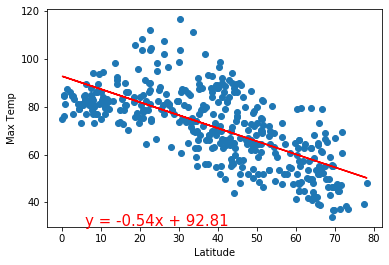

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


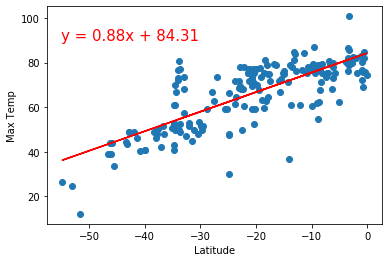

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


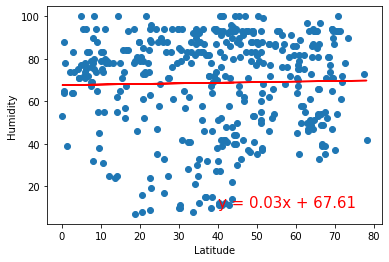

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


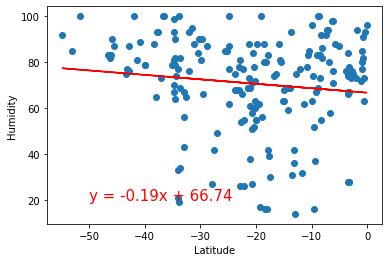

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


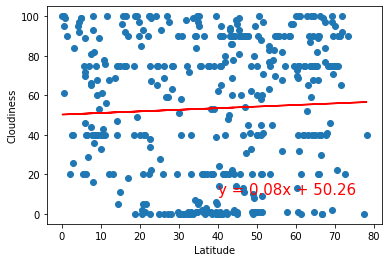

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


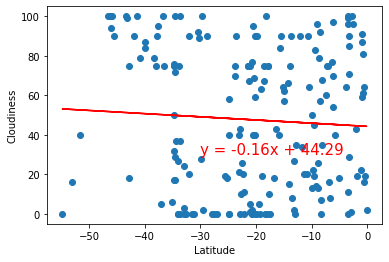

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


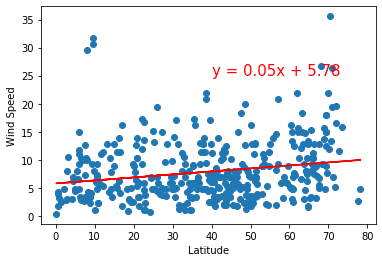

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


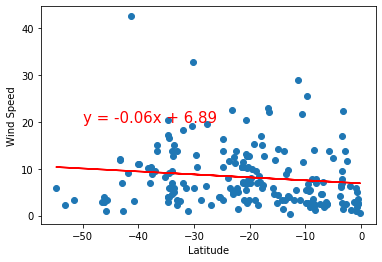